In [4]:
import pandas as pd
import os
import glob

In [5]:
root = "/mnt/hdd/data/Harvard-FairVLMed10k"

df = pd.read_csv(os.path.join(root, "gpt-4_summarized_notes.csv"))

In [6]:
df

,filename,note,gpt_summary
0,data_00001.npz,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...
1,data_00002.npz,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...
2,data_00003.npz,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ..."
3,data_00004.npz,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...
4,data_00005.npz,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...
...,...,...,...
9995,data_09996.npz,"than or equal to 17 mmhg, right eye. -goal int...","Patient has glaucoma, with right eye (OD) intr..."
9996,data_09997.npz,40 y/o male who presents DATE_TIME for iop che...,"40 y/o male, suspect for glaucoma due to enlar..."
9997,data_09998.npz,"57 URLleh/o glaucoma suspect, presents for gla...",57-year-old patient suspected of glaucoma unde...
9998,data_09999.npz,imp: doing well with pciol ou (toric os) pvd o...,"Patient has pciol ou, toric os, pvd ou, and cu..."


In [7]:
image_paths = []

for file in df["filename"].tolist():
    if os.path.exists(os.path.join(root, "Training", file)):
        image_paths.append(f"./Training/{file}")
    elif os.path.exists(os.path.join(root, "Validation", file)):
        image_paths.append(f"./Validation/{file}")
    elif os.path.exists(os.path.join(root, "Test", file)):
        image_paths.append(f"./Test/{file}")
    else:
        print(file)

In [9]:
df["image_path"] = image_paths

In [10]:
df

,filename,note,gpt_summary,image_path
0,data_00001.npz,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...,./Training/data_00001.npz
1,data_00002.npz,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,./Training/data_00002.npz
2,data_00003.npz,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",./Training/data_00003.npz
3,data_00004.npz,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,./Training/data_00004.npz
4,data_00005.npz,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...,./Training/data_00005.npz
...,...,...,...,...
9995,data_09996.npz,"than or equal to 17 mmhg, right eye. -goal int...","Patient has glaucoma, with right eye (OD) intr...",./Test/data_09996.npz
9996,data_09997.npz,40 y/o male who presents DATE_TIME for iop che...,"40 y/o male, suspect for glaucoma due to enlar...",./Test/data_09997.npz
9997,data_09998.npz,"57 URLleh/o glaucoma suspect, presents for gla...",57-year-old patient suspected of glaucoma unde...,./Test/data_09998.npz
9998,data_09999.npz,imp: doing well with pciol ou (toric os) pvd o...,"Patient has pciol ou, toric os, pvd ou, and cu...",./Test/data_09999.npz


In [13]:
df.to_csv(os.path.join(root, "caption_all.csv"), index=False)

In [14]:
df_train = df.loc[df["image_path"].str.contains("Training")]
df_val = df.loc[df["image_path"].str.contains("Validation")]
df_test = df.loc[df["image_path"].str.contains("Test")]

df_train.to_csv(os.path.join(root, "caption_train.csv"), index=False)
df_val.to_csv(os.path.join(root, "caption_validation.csv"), index=False)
df_test.to_csv(os.path.join(root, "caption_test.csv"), index=False)

In [17]:
import numpy as np

sample = np.load(os.path.join(root, df["image_path"].tolist()[0]))

sample.keys()

KeysView(NpzFile '/mnt/hdd/data/Harvard-FairVLMed10k/./Training/data_00001.npz' with keys: slo_fundus, maritalstatus, ethnicity, language, gender...)

In [18]:
sample["slo_fundus"]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12, 11, 11],
       [ 0,  0,  0, ..., 14, 16, 13],
       [ 0,  0,  0, ..., 14, 14, 14]], dtype=uint8)

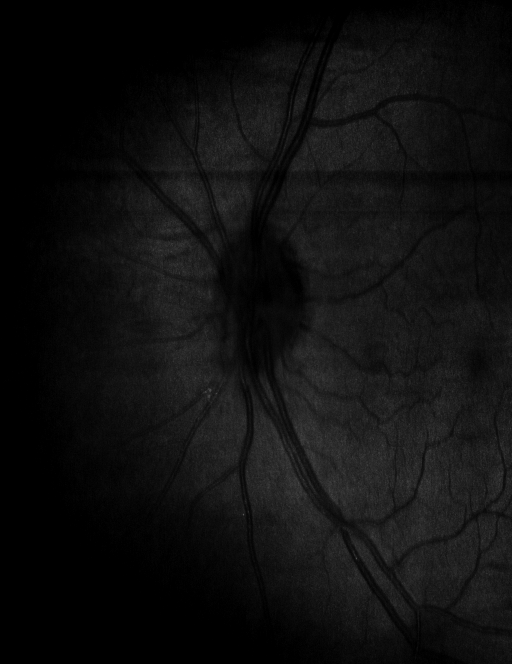

In [21]:
from PIL import Image

Image.fromarray(sample["slo_fundus"]).convert("RGB")

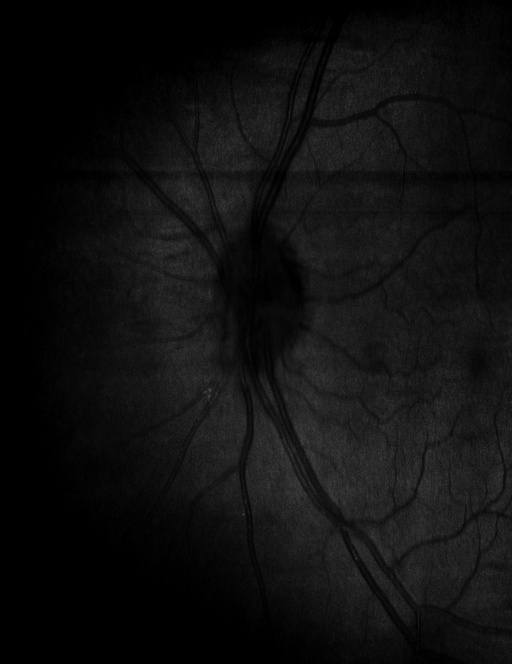

In [22]:
Image.open(os.path.join(root, "Training/slo_fundus_00001.jpg"))